<a href="https://colab.research.google.com/github/lohithready/ihub-iiith/blob/main/AIML_III_Module_2_Lab2_Principal_Components_Analysis_(PCA)(Lohtih's).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 2: Principal Components Analysis (PCA)


---

This lab is designed to give you an understanding of Principal Components
Analysis (PCA). PCA has been called one of the most valuable results from applied linear algebra. PCA is used abundantly in all forms of analysis - from neuroscience to computer graphics - because it is a simple, non-parametric method of extracting relevant information from confusing data sets.

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

PCA is generally used for 2 applications:
1.   Visualization of high dimentional datasets.
2.   Reducing number of features, thereby speeding up ML algorithms.


We will be primarily focussing on the first application in this lab.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

In this lab, we will be using the breast_cancer dataset. The data has 569 samples with thirty features, and each sample has a label associated with it (benign or malignant).

In [2]:
wine_data = load_wine().data
print("Features:", wine_data.shape)  ### 569 rows and 30 columns expected, results in a numpy array with one instance and its features(bening/malignant)

wine_labels = np.reshape(load_wine().target, (178,1))
print("Target:", wine_labels.shape) ### 569 rows and 1 target column expected, results in an array reshaped with single row.

Features: (178, 13)
Target: (178, 1)


In [3]:
## Creating a Pandas dataframe for the dataset with the last column as the target variable

final_wine_data = np.concatenate([wine_data, wine_labels],axis=1)
wine_dataset = pd.DataFrame(final_wine_data)
#naming the col
features = load_wine().feature_names
features_labels = np.append(features,'label')
wine_dataset.columns = features_labels
wine_dataset.head() #displays the first 5rows

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
# Dividing the values into the features and labels for convenience later on

X = wine_dataset.iloc[:,:-1].values
y = wine_dataset.iloc[:,-1].values

print(np.shape(X), np.shape(y))

(178, 13) (178,)


### Step By Step Computation Of PCA
The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data

2. Computing the covariance matrix

3. Calculating the eigenvectors and eigenvalues

4. Computing the Principal Components

5. Reducing the dimensions of the data set


### 1. Standardization of the data

---
It is a common practice to normalize your data before feeding it to any machine learning algorithm.

To apply normalization, you will import StandardScaler module from the sklearn library and then apply scaling by doing fit_transform on the feature data. While applying StandardScaler, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.


In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

print(np.std(X_std))

1.0


In [ ]:
#print("this", X_std_df.shape[1])
print('length', len(features))

length 13


Here's the data after scaling. Yes, we do loose the numerical meaning of the data, but that's okay. We are more interested in the relative positions of the data points with respect to each other.

In [ ]:
X_std_df = pd.DataFrame(X_std)
X_std_df.columns = features
X_std_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### 2. Computing the covariance matrix

---

Recall that covariance is always measured between 2 dimensions. If we have a data set with more than 2 dimensions, there is more than one covariance measurement that can be calculated. For example, from a 3 dimensional data set (dimensions x,y,z) you could calculate cov(x,y), cov(y,z) and cov(x,z). In fact, for an n-dimensional data set, you can calculate N combinatorial 2 different covariances.

Here we have 30 different features, so we will have to compute 435 different covariances.

In [ ]:
mean_vec = np.mean(X_std, axis=0) ## Computing feature wise means

# Covariance matrix = i/(N-1) * X^T * X
# where X is the normalized feature matrix and N is the number of data points (rows)

cov_mat = 1/ (X_std.shape[0]-1) * (X_std - mean_vec).T.dot(X_std - mean_vec)

print("Covariance matrix first 5 rows and columns:")
print(cov_mat[0:5, 0:5])

Covariance matrix first 5 rows and columns:
[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039 ]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972]]


In [ ]:
cov_mat.shape

(13, 13)

A perhaps simpler way to do this is by using the numpy's covariance module "np.cov". However note that it takes as input the feature matrix with features in different rows, so in our application, we would be taking a transpose of the feature matrix before applying np.cov().

In [ ]:
cov_mat_numpy = np.cov(X_std.T)

print("Covariance matrix first 5 rows and columns:")
print(cov_mat_numpy[0:5, 0:5])

Covariance matrix first 5 rows and columns:
[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039 ]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972]]


### 3. Calculating the eigenvectors and eigenvalues

---

Since the covariance matrix is square, we can calculate the eigenvectors and eigenvalues for this matrix. These are rather important, as they tell us useful information about our data.

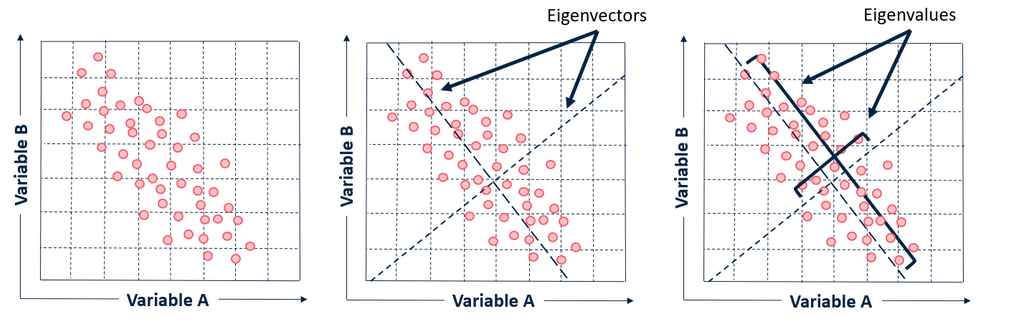

See how one of the eigenvectors goes through the middle of the points, like drawing a line of best fit? That eigenvector is showing us how these two data sets are related along that line. The second eigenvector gives us the other, less important, pattern in the data, that all the points follow the main line, but are off to the side of the main line by some amount.

So, by this process of taking the eigenvectors of the covariance matrix, we have
been able to extract lines that characterise the data.

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [ ]:
eig_vals.shape, eig_vecs.shape

((13,), (13, 13))

### 4. Computing the Principal Components

---




Explained variance:
[36.198848099926344, 19.207490257008914, 11.123630536249971, 7.069030182714029, 6.563293679648591, 4.935823319222559, 4.238679322623324, 2.6807489483788673, 2.2221534047897107, 1.9300190939440791, 1.7368356899899167, 1.2982325756042157, 0.795214889899454]
Cumulative explained variance:
[ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   92.01754435  94.23969775  96.16971684
  97.90655253  99.20478511 100.        ]


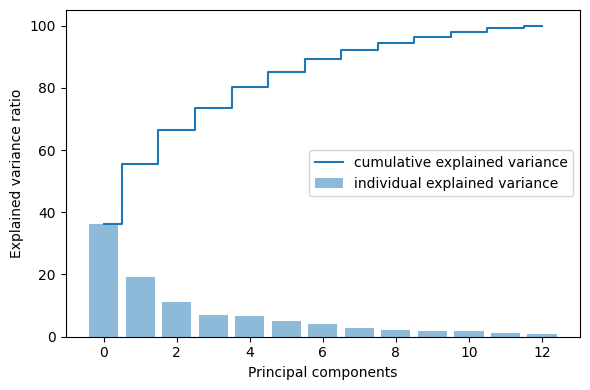

In [ ]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("Explained variance:")
print(var_exp)

cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance:")
print(cum_var_exp)

# Plotting the variance explained by each component and the cumulative variance explained

plt.figure(figsize=(6 , 4))
plt.bar(range(13), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(13), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

So, the first principal component alone explains more than 38% variance in the dataset. Also note that considering all the 13 dimensions explains 100% of the variance in the dataset as expected.

Choosing a suitable number of components for further visualizations is generally based on the cumulative sum of PCs. The first 2 PCs explain nearly 60% variance, and the first 3 explain close to 75% variance.

Lets now try and reduce the dimensions of our dataset to the first 2 and 3 principal components

### 5. Reducing the dimensions of the data set

---



In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(13,1),
                      eig_pairs[1][1].reshape(13,1),
                      eig_pairs[2][1].reshape(13,1)))

Y = X_std.dot(matrix_w)

print(Y)

[[-3.31675081e+00 -1.44346263e+00  1.65739045e-01]
 [-2.20946492e+00  3.33392887e-01  2.02645737e+00]
 [-2.51674015e+00 -1.03115130e+00 -9.82818670e-01]
 [-3.75706561e+00 -2.75637191e+00  1.76191842e-01]
 [-1.00890849e+00 -8.69830821e-01 -2.02668822e+00]
 [-3.05025392e+00 -2.12240111e+00  6.29395827e-01]
 [-2.44908967e+00 -1.17485013e+00  9.77094891e-01]
 [-2.05943687e+00 -1.60896307e+00 -1.46281883e-01]
 [-2.51087430e+00 -9.18070957e-01  1.77096903e+00]
 [-2.75362819e+00 -7.89437674e-01  9.84247490e-01]
 [-3.47973668e+00 -1.30233324e+00  4.22735217e-01]
 [-1.75475290e+00 -6.11977229e-01  1.19087832e+00]
 [-2.11346234e+00 -6.75706339e-01  8.65086426e-01]
 [-3.45815682e+00 -1.13062988e+00  1.20427635e+00]
 [-4.31278391e+00 -2.09597558e+00  1.26391275e+00]
 [-2.30518820e+00 -1.66255173e+00 -2.17902616e-01]
 [-2.17195527e+00 -2.32730534e+00 -8.31729866e-01]
 [-1.89897118e+00 -1.63136888e+00 -7.94913792e-01]
 [-3.54198508e+00 -2.51834367e+00  4.85458508e-01]
 [-2.08452220e+00 -1.06113799e+

Now, that you have spent such a long time building this final matrix Y which has reduced each datapoint to 3 dimensions......

All of this can also be done in 2 lines by using sklearn's PCA module.

In [ ]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

print(Y_sklearn)

[[ 3.31675081e+00 -1.44346263e+00 -1.65739045e-01]
 [ 2.20946492e+00  3.33392887e-01 -2.02645737e+00]
 [ 2.51674015e+00 -1.03115130e+00  9.82818670e-01]
 [ 3.75706561e+00 -2.75637191e+00 -1.76191842e-01]
 [ 1.00890849e+00 -8.69830821e-01  2.02668822e+00]
 [ 3.05025392e+00 -2.12240111e+00 -6.29395827e-01]
 [ 2.44908967e+00 -1.17485013e+00 -9.77094891e-01]
 [ 2.05943687e+00 -1.60896307e+00  1.46281883e-01]
 [ 2.51087430e+00 -9.18070957e-01 -1.77096903e+00]
 [ 2.75362819e+00 -7.89437674e-01 -9.84247490e-01]
 [ 3.47973668e+00 -1.30233324e+00 -4.22735217e-01]
 [ 1.75475290e+00 -6.11977229e-01 -1.19087832e+00]
 [ 2.11346234e+00 -6.75706339e-01 -8.65086426e-01]
 [ 3.45815682e+00 -1.13062988e+00 -1.20427635e+00]
 [ 4.31278391e+00 -2.09597558e+00 -1.26391275e+00]
 [ 2.30518820e+00 -1.66255173e+00  2.17902616e-01]
 [ 2.17195527e+00 -2.32730534e+00  8.31729866e-01]
 [ 1.89897118e+00 -1.63136888e+00  7.94913792e-01]
 [ 3.54198508e+00 -2.51834367e+00 -4.85458508e-01]
 [ 2.08452220e+00 -1.06113799e+

## Let's visualize our dataset in 2 and 3 dimensions now

---



In [ ]:
final_df = pd.DataFrame(columns=["PC1", "PC2", "PC3", "Label"])

for i in range(len(Y)):

    dicti = dict()

    dicti["PC1"] = Y[i, 0]
    dicti["PC2"] = Y[i, 1]
    dicti["PC3"] = Y[i, 2]
    if (int(wine_labels[i][0]) == 0):
      dicti["Label"] = "Class 01"
    else:
      dicti["Label"] = "Class 02"

    final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)


final_df.head()

,PC1,PC2,PC3,Label
0,-3.316751,-1.443463,0.165739,Class 01
1,-2.209465,0.333393,2.026457,Class 01
2,-2.516740,-1.031151,-0.982819,Class 01
3,-3.757066,-2.756372,0.176192,Class 01
4,-1.008908,-0.869831,-2.026688,Class 01


from matplotlib import pyplot as plt
_df_0['PC1'].plot(kind='hist', bins=20, title='PC1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PC2'].plot(kind='hist', bins=20, title='PC2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['PC3'].plot(kind='hist', bins=20, title='PC3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='PC2', y='PC3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['PC1'].plot(kind='line', figsize=(8, 4), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['PC2'].plot(kind='line', figsize=(8, 4), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['PC3'].plot(kind='line', figsize=(8, 4), title='PC3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_label = final_df.Label.tolist()
for_hover = final_df.Label.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_label,
                 title="Principal Component Axis",
                 color_discrete_map={"Benign": "aqua", "Malignant": "yellow"})

fig.update_layout(
    xaxis=dict(title = 'PC1', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    yaxis=dict(title = 'PC2', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    plot_bgcolor='#555555',
    font=dict(
        family="Times New Roman",
        size=16,
        color="Black"))
fig.update_traces(marker=dict(size=8,))

fig.show(renderer = "colab")

### Question:
Referring to the plot above, can you reason why PCA can be a good candidate before training models for Machine learning?

#### Answer:
You can see that the first 2 principal components were able to differentiate the class01 and class02 types in the wine dataset. This motivates the use of the second application of PCA, which was to reduce the number of features in the dataset so that the machine learning algorithm can be trained without overfitting.



Let us now try and visualize this in the first 3 Principal Components space.

In [ ]:
fig = px.scatter_3d(final_df, x='PC1', y='PC2', z='PC3', color='Label', title="Principal Component Axis")
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")

Feel free to explore this interactive plot by PLOTLY, which is also another great tool for visualizations. You can zoom, pan, rotate, turn and download this plot.

In [4]:

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components needed to retain 90% of the variance
n_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1
n_components_90, cumulative_explained_variance


(8,
 array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
        0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
        0.97906553, 0.99204785, 1.        ]))

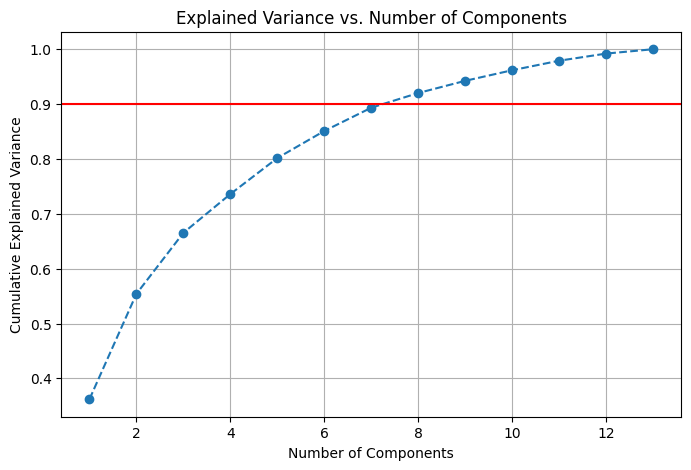

8

In [5]:

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='-')
plt.show()

# Determine the number of components needed to retain 90% of the variance
n_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1

n_components_90


Exersise
1. How many components do you need to retain 90% of the variance in the data?
**Ans:** >6.5 or 8 components are required to retain 90%
2. Find one other use case that makes use of PCA and summarize how it is applied to the problem domain.

### Some interesting references:

1. https://builtin.com/data-science/step-step-explanation-principal-component-analysis

2. http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf

3. https://www.cs.cmu.edu/~elaw/papers/pca.pdf

4. https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60